In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests

In [1]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

### ----- Helpers--------

In [2]:
# # write a function to make a call to the API

def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [3]:
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [6]:
#Testing the function
yelp_call(url_params,api_key)

[{'id': 'ehUuSk5gPTCQmwS_ubgKRA',
  'alias': 'upstate-new-york-2',
  'name': 'Upstate',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU7MF7DT0RzNL-EebQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/upstate-new-york-2?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
  'review_count': 1784,
  'categories': [{'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'wine_bars', 'title': 'Wine Bars'},
   {'alias': 'beerbar', 'title': 'Beer Bar'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.7263139141197,
   'longitude': -73.9864901976935},
  'transactions': ['restaurant_reservation'],
  'price': '$$',
  'location': {'address1': '95 1st Ave',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10003',
   'country': 'US',
   'state': 'NY',
   'display_address': ['95 1st Ave', 'New York, NY 10003']},
  'phone': '+16467915400',
  'display_phone': '

In [7]:
term = 'Restaurants'
location = 'New York'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [8]:
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

19000 total matches found.
20


In [9]:
all_restaurants[0][0]

{'id': 'ehUuSk5gPTCQmwS_ubgKRA',
 'alias': 'upstate-new-york-2',
 'name': 'Upstate',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU7MF7DT0RzNL-EebQ/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/upstate-new-york-2?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
 'review_count': 1784,
 'categories': [{'alias': 'seafood', 'title': 'Seafood'},
  {'alias': 'wine_bars', 'title': 'Wine Bars'},
  {'alias': 'beerbar', 'title': 'Beer Bar'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.7263139141197, 'longitude': -73.9864901976935},
 'transactions': ['restaurant_reservation'],
 'price': '$$',
 'location': {'address1': '95 1st Ave',
  'address2': '',
  'address3': '',
  'city': 'New York',
  'zip_code': '10003',
  'country': 'US',
  'state': 'NY',
  'display_address': ['95 1st Ave', 'New York, NY 10003']},
 'phone': '+16467915400',
 'display_phone': '(646) 791-5400',
 'distance

In [10]:
#function to parse the data and keep only the ones to be uploaded in AWS DB
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [11]:
#call the function and return a list with only the columns names in SQL
parsed_restaurants_v1 = parse_api(all_restaurants)

In [12]:
len(parsed_restaurants_v1)

1000

In [13]:
parsed_restaurants_v1

[{'restaurant_id': 'ehUuSk5gPTCQmwS_ubgKRA',
  'restaurant_name': 'Upstate',
  'price': '$$',
  'rating': 4.5,
  'review_count': 1784},
 {'restaurant_id': 'ETgJqJHV7BW6pIr9Ox74sA',
  'restaurant_name': 'Amélie',
  'price': '$$',
  'rating': 4.5,
  'review_count': 2565},
 {'restaurant_id': 'jjJc_CrkB2HodEinB6cWww',
  'restaurant_name': 'LoveMama',
  'price': '$$',
  'rating': 4.5,
  'review_count': 4570},
 {'restaurant_id': 'C2o3Iw-DXjoUJFgQIbiqkQ',
  'restaurant_name': 'BoCaphe',
  'price': '$$',
  'rating': 4.0,
  'review_count': 1288},
 {'restaurant_id': 'CwOAKJdX8AMz5iAoA-ZEuA',
  'restaurant_name': 'Uglyduckling',
  'price': '$$',
  'rating': 4.0,
  'review_count': 458},
 {'restaurant_id': '0CjK3esfpFcxIopebzjFxA',
  'restaurant_name': "Joe's Shanghai",
  'price': '$$',
  'rating': 4.0,
  'review_count': 5942},
 {'restaurant_id': 'UA2M9QFZghe-9th2KwLoWQ',
  'restaurant_name': 'Burger & Lobster',
  'price': '$$',
  'rating': 4.0,
  'review_count': 5273},
 {'restaurant_id': 's3jou_L_

In [14]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [15]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,ehUuSk5gPTCQmwS_ubgKRA,Upstate,$$,4.5,1784
1,ETgJqJHV7BW6pIr9Ox74sA,Amélie,$$,4.5,2565
2,jjJc_CrkB2HodEinB6cWww,LoveMama,$$,4.5,4570
3,C2o3Iw-DXjoUJFgQIbiqkQ,BoCaphe,$$,4.0,1288
4,CwOAKJdX8AMz5iAoA-ZEuA,Uglyduckling,$$,4.0,458


In [16]:
len(df)

1000

In [17]:
# df.to_excel("Restaurant_1.xlsx")

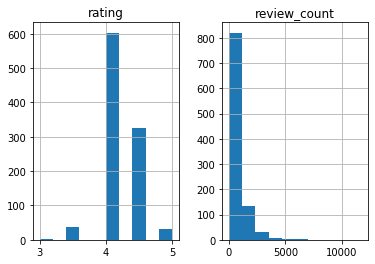

In [19]:
df.hist()
plt.show()

In [20]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,ehUuSk5gPTCQmwS_ubgKRA,Upstate,$$,4.5,1784
1,ETgJqJHV7BW6pIr9Ox74sA,Amélie,$$,4.5,2565
2,jjJc_CrkB2HodEinB6cWww,LoveMama,$$,4.5,4570
3,C2o3Iw-DXjoUJFgQIbiqkQ,BoCaphe,$$,4.0,1288
4,CwOAKJdX8AMz5iAoA-ZEuA,Uglyduckling,$$,4.0,458


In [21]:
df.price.value_counts(normalize=True)

$$      0.704
$$$     0.115
        0.076
$       0.074
$$$$    0.031
Name: price, dtype: float64

In [3]:
df = pd.read_excel("Restaurant_1.xlsx")

In [4]:
df.head()

,Unnamed: 0,restaurant_id,restaurant_name,price,rating,review_count
0,0,ehUuSk5gPTCQmwS_ubgKRA,Upstate,$$,4.5,1784
1,1,ETgJqJHV7BW6pIr9Ox74sA,Amélie,$$,4.5,2565
2,2,jjJc_CrkB2HodEinB6cWww,LoveMama,$$,4.5,4570
3,3,C2o3Iw-DXjoUJFgQIbiqkQ,BoCaphe,$$,4.0,1288
4,4,CwOAKJdX8AMz5iAoA-ZEuA,Uglyduckling,$$,4.0,458


In [24]:
restaurant_id_list = list(df.restaurant_id)

In [25]:
restaurant_id_list

['ehUuSk5gPTCQmwS_ubgKRA',
 'ETgJqJHV7BW6pIr9Ox74sA',
 'jjJc_CrkB2HodEinB6cWww',
 'C2o3Iw-DXjoUJFgQIbiqkQ',
 'CwOAKJdX8AMz5iAoA-ZEuA',
 '0CjK3esfpFcxIopebzjFxA',
 'UA2M9QFZghe-9th2KwLoWQ',
 's3jou_L_LVYGkNHiuhjlew',
 'VvsZAnEwU4c8Xkyrzx05Nw',
 'I2lgw_7DUnwD92ND4PN-Ow',
 'B3_K2kUVbYOU0VaLcj_LTw',
 'ysqgdbSrezXgVwER2kQWKA',
 'xt4sa64WOrpJvZBDPNPNYg',
 'FlZ1zdVEKWv7dwqm8Uw8-w',
 'xZ96vaoL-cQjfotmUKtjJQ',
 'nU4XBdvxDABXqZ6CnB8Dig',
 'hmdm-dO72hLsMQwQRcGEUQ',
 'LpVbI-E9C-CSp7WhU5h2Iw',
 'cTE0e96GYzet799EJeStoQ',
 'fVbUVAiLiGgLA_nxBFxyww',
 'ULt3kmA0_hbZ3j6cMORCaA',
 '44SY464xDHbvOcjDzRbKkQ',
 'qOomR3AwClOGpV1HdqOTFg',
 'Lbs8QBRN1U7IYBo5Mcv-RQ',
 'X8ZS-dgiMIJvhwf9SaDnjw',
 'qEe7nIhPfEL6L0-VYhWRrA',
 'XipQLDbyTl5tsLlyzAWzug',
 'kxykwx5qTWBhlMh18MQ82Q',
 'I6KHYESZdZQz0fnMaMyIpQ',
 'qm1J_dPA5IHij1oAnoZwHw',
 'Me4TxTbPPQZQopW1wOGx5g',
 'XEugUtbw4rRmGr9S1XA-aQ',
 '4aF0F8w7yXX9o5_QFky_ig',
 'StF9WWWbrRzEOmNAcEINcA',
 '3xTQT7qjZJIxc-eBiFMerQ',
 '5m-TrbqMNnwJvOd7pAt6OA',
 '0dDCDQz7DrKkSvu9h2hcQw',
 

In [8]:
# scrape 10 reviews for one restaurant


In [10]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'ETgJqJHV7BW6pIr9Ox74sA'
full_url = url_prefix+test_id+url_suffix

In [11]:
#testing the concatenation
full_url

'https://www.yelp.com/biz/ETgJqJHV7BW6pIr9Ox74sA?rh_type=phrase'

In [12]:
from bs4 import BeautifulSoup
import requests

In [19]:
#parse html file
source = requests.get(full_url).text

In [20]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [21]:
soup = BeautifulSoup(source,'html')

In [23]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [71]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [72]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">The food and drinks here are both delicious. <br/>We started with cocktails...both very strong. <br/>Then we did a flight of wine...definitely a must! <br/>For appetizers we had the mussels...just ok I would not recommend. <br/>We also had the tuna tartare...amazing! <br/>For dinner I had the salmon special...it was perfectly moist and seasoned. My boyfriend has the steak which was just ok...we've had better. <br/>For dessert I had the chocolate cake and my boyfriend had the creme brûlée which he said was the best he's ever had! <br/>Definitely a place worth visiting in the nyc area!</span>

In [74]:
reviews_section.text

"The food and drinks here are both delicious. We started with cocktails...both very strong. Then we did a flight of wine...definitely a must! For appetizers we had the mussels...just ok I would not recommend. We also had the tuna tartare...amazing! For dinner I had the salmon special...it was perfectly moist and seasoned. My boyfriend has the steak which was just ok...we've had better. For dessert I had the chocolate cake and my boyfriend had the creme brûlée which he said was the best he's ever had! Definitely a place worth visiting in the nyc area!"

In [75]:
rating_section = soup.find(class_='lemon--div__373c0__1mboc i-stars__373c0__30xVZ i-stars--regular-5__373c0__3En2C border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I')

In [89]:
rating_section['aria-label']

'5 star rating'

In [102]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">The food and drinks here are both delicious. <br/>We started with cocktails...both very strong. <br/>Then we did a flight of wine...definitely a must! <br/>For appetizers we had the mussels...just ok I would not recommend. <br/>We also had the tuna tartare...amazing! <br/>For dinner I had the salmon special...it was perfectly moist and seasoned. My boyfriend has the steak which was just ok...we've had better. <br/>For dessert I had the chocolate cake and my boyfriend had the creme brûlée which he said was the best he's ever had! <br/>Definitely a place worth visiting in the nyc area!</span>,
 <span class="lemon--span__373c0__3997G" lang="en">My boyfriend took me here for my birthday earlier this month. It was something different for us since typically favor Latin American and Caribbean cuisine. But boy oh boy, was this place amazing! The flavors of each dish we ordered blew our minds. We were both so glad to have changed things up from

In [97]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append(all_reviews_section[i].text)

In [103]:
reviews

["The food and drinks here are both delicious. We started with cocktails...both very strong. Then we did a flight of wine...definitely a must! For appetizers we had the mussels...just ok I would not recommend. We also had the tuna tartare...amazing! For dinner I had the salmon special...it was perfectly moist and seasoned. My boyfriend has the steak which was just ok...we've had better. For dessert I had the chocolate cake and my boyfriend had the creme brûlée which he said was the best he's ever had! Definitely a place worth visiting in the nyc area!",
 "My boyfriend took me here for my birthday earlier this month. It was something different for us since typically favor Latin American and Caribbean cuisine. But boy oh boy, was this place amazing! The flavors of each dish we ordered blew our minds. We were both so glad to have changed things up from our usual. He surprised me and it was definitely a pleasant and welcomed surprise. For appetizers we shared the Warm Pistachio Crusted Goa

In [112]:
len(reviews)

20

In [111]:
pd.DataFrame(reviews).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,The food and drinks here are both delicious. W...,My boyfriend took me here for my birthday earl...,We came for our anniversary dinner. I got the ...,Came here for a light dinner with my friend an...,Amelie is a lively wine bar with with cheese a...,This was my second time I visited the place. T...,I am simply in love. This has become my new fa...,- One of my favourite French restaurants in ny...,It really tasted like the last week of summer....,Meh. Pretty good. Middle of the road classic F...,I feel like it is very difficult to find a goo...,The happy hour deal can't be beat - wine fligh...,"This place is the BOMB!!! Eric, the manager, ...",Got my first wine flight here and I was not di...,I was in the area today and looked on yelp for...,Truly enjoyed our dining experience at Amelie....,We will be back again and again - we just had ...,One of my favorite spots in the City and defin...,"This French wine bar is such a cozy spot, even...",My girlfriend took me here for my birthday din...


In [114]:
# using a function to scrape reviews with restaurant ID in a list
def scrape_list(list_id):
    reviews=[]
    for resto_id in list_id:
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = '?rh_type=phrase'
        test_id = resto_id
        full_url = url_prefix+test_id+url_suffix
        
        source = requests.get(full_url).text
        soup = BeautifulSoup(source,'html')
        all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
        
        for i in range(len(all_reviews_section)):
            reviews.append(all_reviews_section[i].text)
            
    return reviews           
        

In [ ]:
full_reviews = scrape_list(restaurant_id_list)

In [ ]:
len(full_reviews